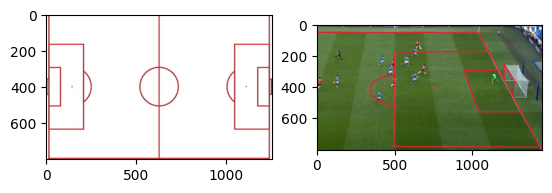

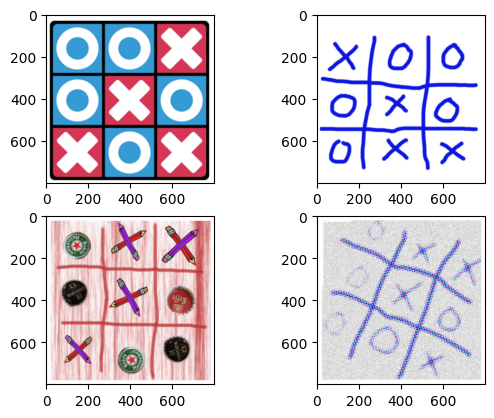

In [86]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
import functions as u

import importlib
importlib.reload(u)

ima = u.read_and_resize(800, "../img/ima.png")
imb = u.read_and_resize(800, "../img/imb.png")
imc = u.read_and_resize(800, "../img/imc.png")
imd = u.read_and_resize(800, "../img/imd.png")

ref = u.read_and_resize(800,"../../docs/img/reference.jpeg")
hom = u.read_and_resize(800,"../../docs/img/homography.jpeg")

plt.figure()
plt.subplot(1,2,1)
u.show(ref)
plt.subplot(1,2,2)
u.show(hom)

plt.figure()
plt.subplot(2, 2, 1)
u.show(ima)
plt.subplot(2, 2, 2)
u.show(imb)
plt.subplot(2, 2, 3)
u.show(imc)
plt.subplot(2, 2, 4)
u.show(imd)


## Érosion

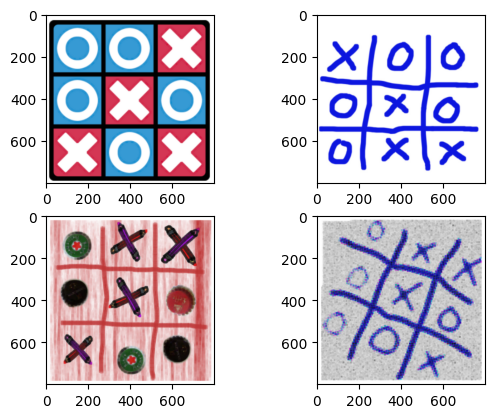

In [87]:
kernel = 3
element = cv2.getStructuringElement(
    cv2.MORPH_RECT, (2*kernel + 1, 2*kernel + 1), (kernel, kernel))

erode_a = cv2.erode(ima, element)
erode_b = cv2.erode(imb, element)
erode_c = cv2.erode(imc, element)
erode_d = cv2.erode(imd, element)

plt.figure()
plt.subplot(2, 2, 1)
u.show(erode_a)
plt.subplot(2, 2, 2)
u.show(erode_b)
plt.subplot(2, 2, 3)
u.show(erode_c)
plt.subplot(2, 2, 4)
u.show(erode_d)


## Median blur

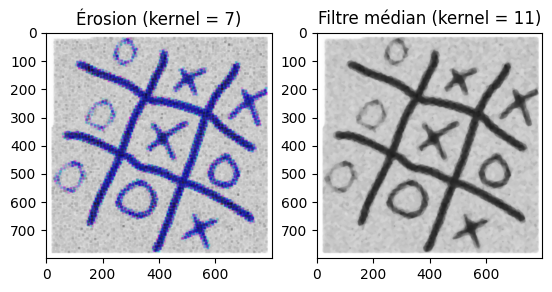

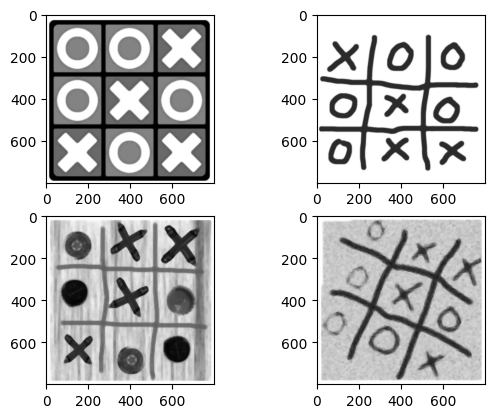

In [88]:

gray_a = cv2.cvtColor(erode_a, cv2.COLOR_BGR2GRAY)
gray_b = cv2.cvtColor(erode_b, cv2.COLOR_BGR2GRAY)
gray_c = cv2.cvtColor(erode_c, cv2.COLOR_BGR2GRAY)
gray_d = cv2.cvtColor(erode_d, cv2.COLOR_BGR2GRAY)

median_a = cv2.medianBlur(gray_a, 11)
median_b = cv2.medianBlur(gray_b, 11)
median_c = cv2.medianBlur(gray_c, 11)
median_d = cv2.medianBlur(gray_d, 11)

plt.figure()
plt.subplot(1,2,1)
plt.title("Érosion (kernel = 7)")
u.show(erode_d)
plt.subplot(1,2,2)
plt.title("Filtre médian (kernel = 11)")
u.show(median_d)

plt.figure()
plt.subplot(2, 2, 1)
u.show(median_a)
plt.subplot(2, 2, 2)
u.show(median_b)
plt.subplot(2, 2, 3)
u.show(median_c)
plt.subplot(2, 2, 4)
u.show(median_d)


## Canny

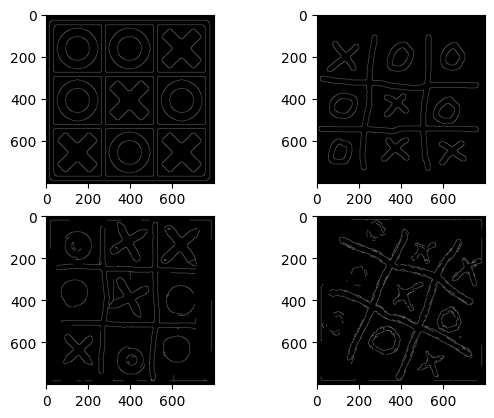

In [89]:

canny_a = cv2.Canny(median_a, 100, 200)
canny_b = cv2.Canny(median_b, 100, 200)
canny_c = cv2.Canny(median_c, 100, 200)
canny_d = cv2.Canny(median_d, 100, 200)

plt.figure()
plt.subplot(2, 2, 1)
u.show(canny_a)
plt.subplot(2, 2, 2)
u.show(canny_b)
plt.subplot(2, 2, 3)
u.show(canny_c)
plt.subplot(2, 2, 4)
u.show(canny_d)


## Dilatation

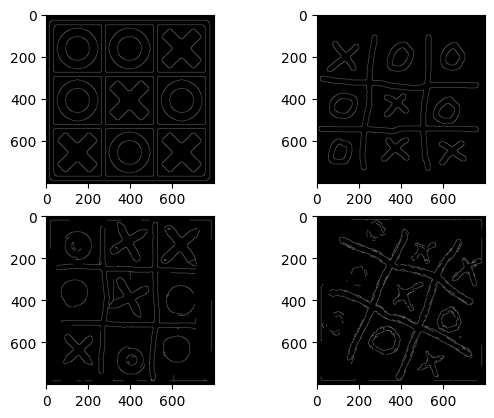

In [90]:
kernel = 0
element = cv2.getStructuringElement(
    cv2.MORPH_RECT, (2*kernel + 1, 2*kernel + 1), (kernel, kernel))

dilate_a = cv2.dilate(canny_a, element)
dilate_b = cv2.dilate(canny_b, element)
dilate_c = cv2.dilate(canny_c, element)
dilate_d = cv2.dilate(canny_d, element)

erode_a = cv2.erode(dilate_a, element)
erode_b = cv2.erode(dilate_b, element)
erode_c = cv2.erode(dilate_c, element)
erode_d = cv2.erode(dilate_d, element)

plt.figure()
plt.subplot(2, 2, 1)
u.show(dilate_a)
plt.subplot(2, 2, 2)
u.show(dilate_b)
plt.subplot(2, 2, 3)
u.show(dilate_c)
plt.subplot(2, 2, 4)
u.show(dilate_d)


## Hough lines transform

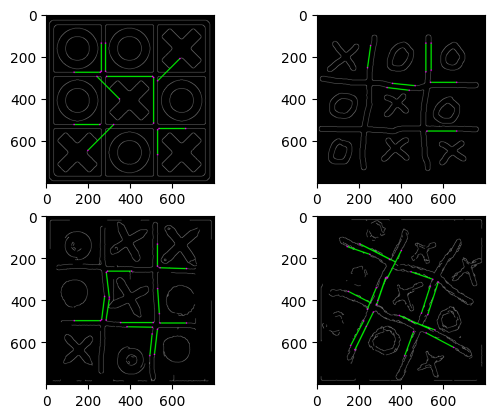

In [91]:
lines_a = u.linesP(dilate_a, gray_a)
lines_b = u.linesP(dilate_b, gray_b)
lines_c = u.linesP(dilate_c, gray_c)
lines_d = u.linesP(dilate_d, gray_d)

'''
img,grid,grid_lines, intersections =u.locate_grid(dilate_d, gray_d)

u.rotate(gray_d,intersections)

plt.figure()
plt.subplot(1,2,1)
u.show(img)
plt.subplot(1,2,2)
u.show(grid)
'''

plt.figure()
plt.subplot(2, 2, 1)
u.show(lines_a)
plt.subplot(2, 2, 2)
u.show(lines_b)
plt.subplot(2, 2, 3)
u.show(lines_c)
plt.subplot(2, 2, 4)
u.show(lines_d)


## Grid

NameError: name 'grid_a' is not defined

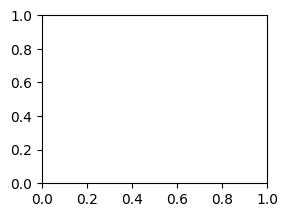

In [92]:
plt.figure()
plt.subplot(2, 2, 1)
u.show(grid_a)
plt.subplot(2, 2, 2)
u.show(grid_b)
plt.subplot(2, 2, 3)
u.show(grid_c)
plt.subplot(2, 2, 4)
u.show(grid_d)


## Corner detection

267.0 268.0
241.0 316.0
190.05840262700883 473.2746799099191
743.4390358295918 403.9047933845056


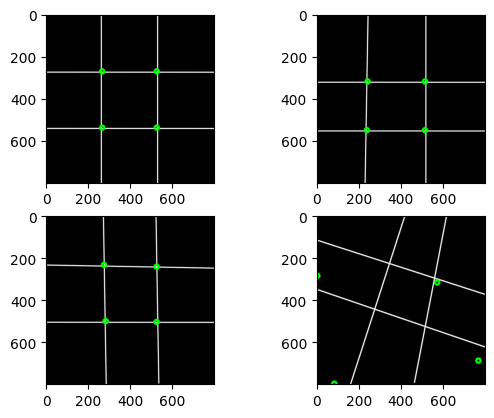

In [ ]:
corn, corners_a = u.corners(grid_a)
corn, corners_b = u.corners(grid_b)
corn, corners_c = u.corners(grid_c)
corn, corners_d = u.corners(grid_d)

plt.figure()
plt.subplot(2, 2, 1)
u.show(corners_a)
plt.subplot(2, 2, 2)
u.show(corners_b)
plt.subplot(2, 2, 3)
u.show(corners_c)
plt.subplot(2, 2, 4)
u.show(corners_d)


284.0017605579233 389.6665240946417 82.02438661763951 116.48175822848829
9.109820676578156
[array([  1, 284]), array([572, 316]), array([ 82, 798]), array([768, 688])]


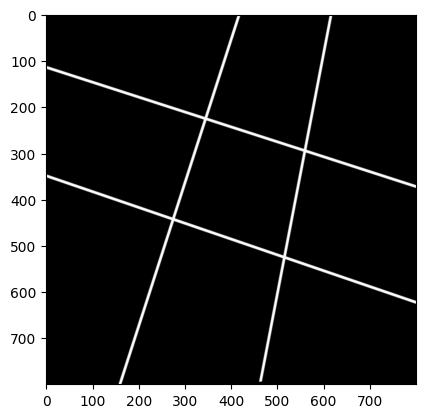

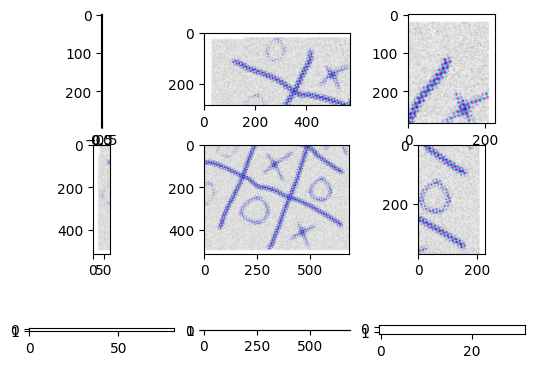

In [ ]:
# corn = corn.tolist()
c = [None, None, None, None]
ctl, ctr, cbl, cbr = [None, None, None, None]

for i in range(0, len(corn)):
    tl = math.sqrt(pow(corn[i][0], 2) + pow(corn[i][1], 2))
    tr = math.sqrt(
        pow(corn[i][0] - corners_b.shape[1], 2) + pow(corn[i][1], 2))
    bl = math.sqrt(pow(corn[i][0], 2) +
                   pow(corn[i][1] - corners_b.shape[0], 2))
    br = math.sqrt(pow(corn[i][0] - corners_b.shape[1], 2) +
                   pow(corn[i][1] - corners_b.shape[0], 2))

    if not ctl or tl < ctl:
        ctl = tl
        c[0] = i
    if not ctr or tr < ctr:
        ctr = tr
        c[1] = i
    if not cbl or bl < cbl:
        cbl = bl
        c[2] = i
    if not cbr or br < cbr:
        cbr = br
        c[3] = i

print(ctl, ctr, cbl, cbr)

corn = [corn[i] for i in c]
co = abs(corn[2][0] - corn[3][0])
hyp = math.sqrt(pow(corn[2][0] - corn[3][0], 2) +
                pow(corn[2][1] - corn[3][1], 2))
angle = 180 * math.acos(co / hyp) / math.pi

print(angle)

h, w = imd.shape[:2]

center = (w/2, h/2)

rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)

# rotate the image using cv2.warpAffine
grid_d = cv2.warpAffine(src=grid_d, M=rotate_matrix, dsize=(w, h))
#corn = cv2.warpAffine(src=corn, M=rotate_matrix, dsize=(w, h))
# while corn[2][1] < corn[3][1] - 50 or corn[2][1] > corn[3][1] + 50:

plt.figure()
u.show(grid_d)
#plt.figure()
#u.show(corn)

print(corn)

zone1 = imd[:corn[0][1], :corn[0][0]]
zone2 = imd[:corn[0][1], corn[0][0]:corn[1][0]]
zone3 = imd[:corn[0][1], corn[1][0]:]
zone4 = imd[corn[0][1]:corn[2][1], :corn[2][0]]
zone5 = imd[corn[0][1]:corn[2][1], corn[2][0]:corn[3][0]]
zone6 = imd[corn[1][1]:corn[3][1], corn[1][0]:]
zone7 = imd[corn[2][1]:, :corn[2][0]]
zone8 = imd[corn[2][1]:, corn[2][0]:corn[3][0]]
zone9 = imd[corn[2][1]:, corn[3][0]:]

plt.figure()
plt.subplot(3, 3, 1)
u.show(zone1)
plt.subplot(3, 3, 2)
u.show(zone2)
plt.subplot(3, 3, 3)
u.show(zone3)
plt.subplot(3, 3, 4)
u.show(zone4)
plt.subplot(3, 3, 5)
u.show(zone5)
plt.subplot(3, 3, 6)
u.show(zone6)
plt.subplot(3, 3, 7)
u.show(zone7)
plt.subplot(3, 3, 8)
u.show(zone8)
plt.subplot(3, 3, 9)
u.show(zone9)


In [ ]:
a = np.array([[0, 4], [5, 2], [2, 1], [3, 1]])
print(math.cos(1.57))
c1, c2, c3 = [None, None, None]


0.0007963267107332633
